In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
from shapely.ops import nearest_points

%matplotlib inline

### Air Pollution Monitoring Data From EDF

In [15]:
df = pd.read_csv('EDF_Data.csv', header = 1)

In [16]:
df['TimePeriod'] = 'Jun2015-May2016'

In [17]:
df.head(500)

,Longitude,Latitude,NO Value,NO2 Value,BC Value,TimePeriod
0,-122.322594,37.806781,23.390071,17.539762,0.818032,Jun2015-May2016
1,-122.322310,37.806150,19.700000,19.956750,0.551475,Jun2015-May2016
2,-122.322301,37.806420,23.611111,23.967768,0.593712,Jun2015-May2016
3,-122.322299,37.805880,15.714285,18.435184,0.489898,Jun2015-May2016
4,-122.322267,37.806689,27.108695,25.797037,0.739341,Jun2015-May2016
...,...,...,...,...,...,...
495,-122.300796,37.806843,10.486667,15.518741,0.658491,Jun2015-May2016
496,-122.300793,37.806668,13.308667,19.304477,0.633097,Jun2015-May2016
497,-122.300784,37.806559,14.545454,21.887397,0.960911,Jun2015-May2016
498,-122.300765,37.822436,14.789343,14.903882,0.695703,Jun2015-May2016


In [18]:
df.shape

(21488, 6)

In [19]:
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]

### METEROLOGICAL DATASET

In [20]:
df_met = pd.read_csv("MetStations_CA.csv")

In [21]:
df_met.head()

,STATION_ID,STATION,BEGIN_DATE,END_DATE,STATE,COUNTRY,LATITUDE,LONGITUDE,ELEVATION_(M)
0,WBAN:23239,"ALAMEDA NAS, CA US",1945-02-28,1997-01-31,California,United States,37.78333,-122.31667,9.1
1,WBAN:94299,"ALTURAS MUNICIPAL AIRPORT, CA US",2004-12-31,2020-02-23,California,United States,41.49139,-120.56444,1333.5
2,WBAN:24283,"ARCATA EUREKA AIRPORT, CA US",1949-11-30,2020-02-23,California,United States,40.97806,-124.10861,61.0
3,WBAN:23224,"AUBURN MUNICIPAL AIRPORT, CA US",2004-12-31,2020-02-23,California,United States,38.95472,-121.08194,466.6
4,WBAN:23191,"AVALON CATALINA AIRPORT, CA US",1943-06-11,2020-02-23,California,United States,33.40500,-118.41583,488.3


In [22]:
crs = {'init': 'epsg:4326'}

In [23]:
geometry_met = [Point(xy) for xy in zip(df_met['LONGITUDE'], df_met['LATITUDE'])]

In [24]:
geo_df = gpd.GeoDataFrame(df, crs = crs, geometry = geometry)
geo_df_met = gpd.GeoDataFrame(df_met, crs = crs, geometry = geometry_met)

### Finding Closest Met Station to get average wind speed, temperature and elevation data

In [25]:
# Unary Union of the geo_df geometry

pts = geo_df_met.geometry.unary_union
def near(point, pts=pts):
     # find the nearest point and return the corresponding Station name
     nearest = geo_df_met.geometry == nearest_points(point, pts)[1]
     return geo_df_met[nearest].STATION.to_numpy()[0]
geo_df['Nearest_Station'] = geo_df.apply(lambda row: near(row.geometry), axis=1)

In [26]:
geo_df['Nearest_Station'].unique()

array(['ALAMEDA NAS, CA US', 'OAKLAND METROPOLITAN, CA US',
       'HAYWARD AIR TERMINAL, CA US'], dtype=object)

### Plotting Data

In [25]:
usa = gpd.read_file('../Idea1/states_21basic/states.shp')
usa.drop(usa[usa['STATE_NAME'] =='Alaska'].index, inplace=True)
usa.drop(usa[usa['STATE_NAME'] =='Hawaii'].index, inplace=True)

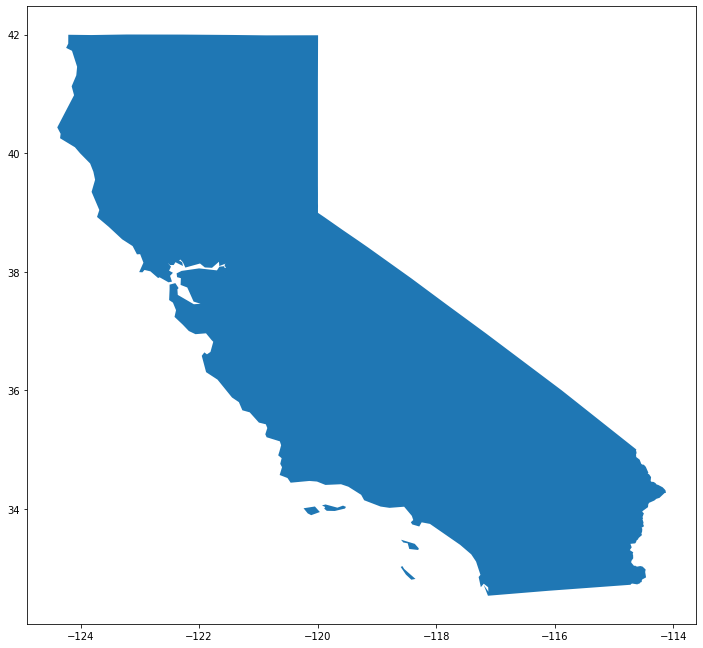

In [28]:
CA = usa[usa.STATE_ABBR == 'CA']
fig, ax = plt.subplots(figsize = (12,12))
CA.plot(ax = ax)

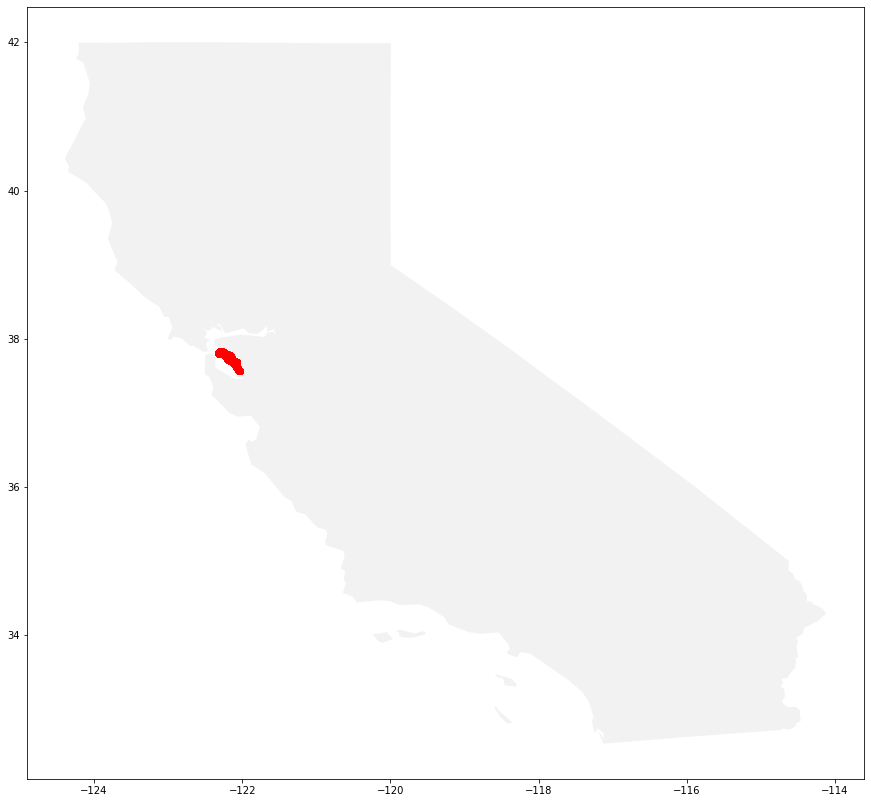

In [30]:
fig, ax = plt.subplots(figsize = (15,15))
CA.plot(ax=ax, alpha = 0.1, color='grey')
geo_df.plot(ax = ax, color='red')